<h1>THE PRICE OF GAS INFLUENCES THE AUTO MARKET</h1>

<img src =https://n6-img-fp.akamaized.net/free-vector/petrol-station-design_1454-41.jpg?size=338&ext=jpg>

<h3>MOTIVATION</h3>

<p>
When thinking about what type of final project we wanted to do, we wanted a topic that we can extract years of data from as well as be a topic that applies to current times. What we have selected was the Fuel economy data that contained fuel economy data from as far as 1978 but for this project we'll be focusing on years 2001 - 2017. The reason we used this time range is due to only wanting to use data within the 2000s while having enough data for formulate more accurate findings. With this data, we also wanted to have a correlations with the price of gas and the types of cars that people bought that year. By the end of this tutorial, you'll find out whether gas prices influence the purchase of cars for the current year.
</p>


In [91]:
!pip install lxml
from bs4 import BeautifulSoup
import pandas as pd
import requests
import re
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model


import os
import shutil

In [2]:
# Open url for scraping. All data sources are stored within a table. All target data files have the
# same naming scheme, we will take advantage of this

In [3]:

url = 'http://www.fueleconomy.gov/feg/download.shtml'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'lxml')


reg = 'epadata/\d{2}data.zip' ##luckily our target has a unique identifier for href
suf = 'http://www.fueleconomy.gov/feg/'

In [4]:
# Find target data sources within html page

In [5]:
links = soup.find_all('a')
zlist = []
for tag in links:
    link = tag.get('href',None)
    if link is not None:
        if re.match(reg, link):
            zlist.append(link)

In [6]:
# Download data to current working directory. These files are zipped. Unzip files.

In [7]:
filelst = []
for x in zlist:
    url = suf+x
    localfn = url.split('/')[-1]
    yearno = int(localfn[:2])
    if yearno < 50 and yearno > 00:
        r = requests.get(url, stream=True)
        with open(localfn, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
        zip_ref = zipfile.ZipFile(localfn, 'r')
        lcl = "dldir"+localfn
        filelst.append(lcl)
        zip_ref.extractall(lcl)
        zip_ref.close()
       
        


In [8]:
os.getcwd()


'/home/jovyan/notebooks/Final Project'

In [9]:
# create directory to store data

In [19]:
datdir = "shibe_data"
if not os.path.exists(datdir):
    print("sss")
    os.makedirs(datdir)

In [11]:
# extract downloaded data to single directory. Rename files so that they have uniform names

In [23]:
os.listdir(os.getcwd() + '//shibe_data')

[]

In [18]:
os.listdir(os.getcwd())

['dldir01data.zip',
 'dldir11data.zip',
 '04data.zip',
 '14data.zip',
 'dldir18data.zip',
 'dldir08data.zip',
 'anime.csv',
 '.DS_Store',
 '15data.zip',
 '05data.zip',
 'dldir09data.zip',
 'rating.csv',
 'dldir10data.zip',
 '07data.zip',
 '17data.zip',
 'dldir02data.zip',
 'dldir12data.zip',
 'dldir13data.zip',
 'dldir03data.zip',
 '16data.zip',
 '06data.zip',
 '03data.zip',
 '13data.zip',
 'dldir06data.zip',
 'dldir16data.zip',
 'dldir17data.zip',
 'dldir07data.zip',
 '12data.zip',
 '02data.zip',
 'README.txt',
 'dldir05data.zip',
 'dldir15data.zip',
 '.ipynb_checkpoints',
 '09data.zip',
 'shibe_data',
 '10data.zip',
 '11data.zip',
 '01data.zip',
 'dldir14data.zip',
 'dldir04data.zip',
 'FinalProj.ipynb',
 '08data.zip',
 '18data.zip',
 'scraper.ipynb']

In [24]:
reg = "(.xlsx|.xls|.csv)$"
for item in filelst:
    for filename in os.listdir(item):
        curname =  item + "//" + filename 
        
        
        m = re.search(reg, filename)
        if m:
            newname = datdir + "//" + item[:-4] + m.group(0)
            os.rename(curname, newname)


In [ ]:
# clean up files and directories created while scraping data

In [25]:

lst = os.listdir(os.getcwd())
for x in lst:
    m = re.search(".zip$", x)
    if m:
        n = re.search("^dldir",x)
        if n:
            shutil.rmtree(x)
        else:
            os.remove(x)


In [ ]:
# Reads data files into Pandas Dataframes according to file type (.csv .xlx .xlsx). The df are stored in a temporary dict 
# according to their respective years. The original zip file from the EPA site does not give year in YYYY format, so we have 
# chosen not to use the YYYY format until this point where it becomes necessary and after we have gleaned out only the years 
# prefixed by "20-"
# Some lines of the original data files are formed incorrectly. Adding the option "error_bad_lines=False" skips these lines

In [27]:
%%capture
datfiles = os.listdir(datdir)
pdfiles = {}
for x in datfiles:
    y = re.search("[0-9]{2}",x)
    year = "20" + y.group(0)
    cs = re.search(".csv$", x)
    if cs:
        newp = pd.read_csv(datdir + "//" + x, error_bad_lines=False)
    else:
        newp = pd.read_excel(datdir + "//" + x)
        
    pdfiles[year] = newp
    

In [ ]:
# Went through all the data files from 2001-2018 and found all the persisting variables and listed their aliases in a dict, varss

In [28]:
varss = {}

varss['Class'] = ['CLASS','Carline Class Desc', 'Class']
varss['Manufacturer'] = ['MFR', 'Manufacturer', 'Mfr Name', 'Mfr Name ']
varss['carline name'] = ['CAR LINE', 'Carline', 'carline name']
varss['cmb'] = ['COMB MPG (GUIDE)', 'Comb FE (Guide) - Conventional Fuel', 'cmb']
varss['cty'] = ['CITY MPG (GUIDE)', 'City FE (Guide) - Conventional Fuel', 'cty']
varss['cyl'] = ['# Cyl', 'NUMB CYL', 'cyl']
varss['displ'] = ['DISPLACEMENT', 'Eng Displ', 'displ']
varss['fcost'] = ['ANL FL CST', 'Annual Fuel1 Cost - Conventional Fuel', 'fcost']
varss['fl'] = ['FUEL TYPE', 'Fuel Usage Desc - Conventional Fuel', 'fl']
varss['hwy'] = ['HWY MPG (GUIDE)', 'Hwy FE (Guide) - Conventional Fuel', 'hwy']
varss['trans'] = ['TRANS', 'Trans as listed in FE Guide (derived from col AA thru AF)', 'Trans in FE Guide (MFR entered for data entered after May 13 2011)', 'Transmission', 'trans']
varss['ucmb'] = ['Comb Unadj FE - Conventional Fuel', 'UNRND COMP (EPA)', 'ucmb']
varss['ucty'] = ['City Unadj FE - Conventional Fuel', 'UNRND CITY (EPA)', 'ucty']
varss['uhwy'] = ['Hwy Unadj FE - Conventional Fuel', 'UNRND HWY (EPA)', 'uhwy']
varss['drv'] = ['DRIVE SYS', 'Drive Sys', 'drv']

In [29]:
varlst = list(varss.keys())
yearlst = list(pdfiles.keys())


for z in yearlst:
    curpd = pdfiles[z]
    cols = list(curpd.columns.values)
    checklst = []
    rename = []
    
    for x in cols:
        for y in varlst:
            if x in varss[y]:
                checklst.append(x)
                rename.append(y)
    curpd = curpd[checklst]
    curpd.columns = rename
    pdfiles[z] = curpd[varlst]


In [104]:
pdfiles['2001']

,Class,Manufacturer,carline name,cmb,cty,cyl,displ,fcost,fl,hwy,trans,ucmb,ucty,uhwy,drv
0,TWO SEATERS,ACURA,NSX,20,17,6,3.0,1162,P,24,Auto(S4),22.9121,19.1342,30.2000,R
1,TWO SEATERS,ACURA,NSX,19,17,6,3.2,1223,P,24,Manual(M6),22.6171,18.7000,30.4000,R
2,TWO SEATERS,AUDI,TT ROADSTER,25,22,4,1.8,930,P,30,Manual(M5),28.7043,23.9499,37.9000,F
3,TWO SEATERS,AUDI,TT ROADSTER QUATTRO,23,20,4,1.8,1011,P,28,Manual(M6),26.7904,22.1821,35.9077,4
4,TWO SEATERS,BMW,Z3 COUPE,24,21,6,3.0,970,P,28,Manual(M5),27.8164,23.3000,36.4523,R
5,TWO SEATERS,BMW,Z3 COUPE,22,19,6,3.0,1058,P,27,Auto(S5),25.7976,21.3268,34.6842,R
6,TWO SEATERS,BMW,Z3 ROADSTER,23,20,6,2.5,1011,P,27,Manual(M5),26.4684,22.1000,34.9000,R
7,TWO SEATERS,BMW,Z3 ROADSTER,22,19,6,2.5,1058,P,26,Auto(S5),25.5414,21.3701,33.5440,R
8,TWO SEATERS,BMW,Z3 ROADSTER,24,21,6,3.0,970,P,28,Manual(M5),27.8164,23.3000,36.4523,R
9,TWO SEATERS,BMW,Z3 ROADSTER,21,19,6,3.0,1107,P,25,Auto(S5),24.7573,20.7065,32.5370,R


In [105]:
print("The mean per year of city is:")
for x in yearlst:
    print(pdfiles[x].cty.mean())

    
print("The mean per year of hwy is:")
for x in yearlst:
    print(pdfiles[x].hwy.mean())
    
print("The mean per year of comb is:")
for x in yearlst:
    print(pdfiles[x].cmb.mean())    

The mean per year of city is:
18.1283905967
18.4362831858
18.3555743243
16.5044105854
20.5707395498
20.438538206
18.4856321839
20.6563838903
19.1021126761
19.5840480274
18.8675438596
16.6579391892
18.4939626784
18.6637554585
18.9862288136
18.8777876896
19.8582214765
20.1558232932
The mean per year of hwy is:
24.9647377939
25.2566371681
24.5945945946
22.9342421812
27.7950160772
28.1727574751
24.3381226054
27.9340188518
25.2288732394
26.9879931389
25.9754385965
23.1055743243
24.5400658617
24.7991266376
25.0381355932
25.1525423729
27.4119127517
27.9164658635
The mean per year of comb is:
20.609403255
20.8920353982
20.6841216216
18.83159583
23.2467845659
23.2666112957
20.7250957854
23.3496143959
21.4037558685
22.2547169811
21.4421052632
18.9695945946
20.8100987925
20.9938864629
21.2627118644
21.2221231044
22.5973154362
22.9614457831


In [59]:
fig = plt.figure()
plt.title('2001')
plt.xlabel('Hwy(MPG)')
plt.ylabel('Manu')

manu = [Suzuki, Honda,BMW,General Motors,Toyota]

for y in yearlst:
    cur = pdfiles[y]
    plt.scatter
    
    
#   cur = man_2001.get_group('foo')  
    plt.scatter(x = pdfiles['2001'].fcost, y = pdfiles['2001'].cty, label=m)
    
plt.legend()    

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [62]:
# manufacturer = []
# for x in yearlst:
#     curpd = pdfiles[x]
#     temp = set(curpd['Manufacturer'].values)
#     manufacturer.extend(list(temp))
# set(manufacturer)
        

{nan,
 'PORSCHE',
 'Mitsubishi Motors Co',
 'INFINITI',
 'Lotus',
 'ISUZU',
 'Mercedes-Benz',
 'SUBARU',
 'HUMMER',
 'GM',
 'ACURA',
 'BUGATTI',
 'Audi',
 'LAND ROVER',
 'SPYKR',
 'JEEP',
 'General Motors',
 'BUICK',
 'PONTIAC',
 'SATURN',
 'VPG',
 'Rolls-Royce',
 'R-R MTR CARS LTD.',
 'Volvo',
 'JAGUAR',
 'Toyota',
 'Mobility Ventures L',
 'FCA US LLC',
 'GDX',
 'OLDSMOBILE',
 'KIA',
 'MORGAN',
 'NISSAN',
 'AUDI',
 'BENTLEY',
 'MITSUBISHI',
 'VOLVO',
 'Jaguar Land Rover L',
 'LINCOLN',
 'aston martin',
 'Kia',
 'Honda',
 'CADILLAC',
 'Bugatti',
 'Mitsubishi Motors NA',
 'LEXUS',
 'Spyker',
 'HONDA',
 'SALEEN PERFORMANCE',
 'TOYOTA',
 'Bentley',
 'MASERATI',
 'FORD',
 'Nissan',
 'McLaren Automotive ',
 'HYUNDAI',
 'Ferrari',
 'Volkswagen',
 'Chrysler Group LLC',
 'VOLKSWAGEN',
 'Subaru',
 'Maserati',
 'BMW',
 'Mahindra',
 'FOMOCO',
 'LOTUS',
 'Lamborghini',
 'Volkswagen Group of',
 'IMPCO',
 'MERCURY',
 'Roush',
 'DODGE',
 'Ford Motor Company',
 'FCA Italy',
 'ROUSH PERFORMANCE',
 'Jag

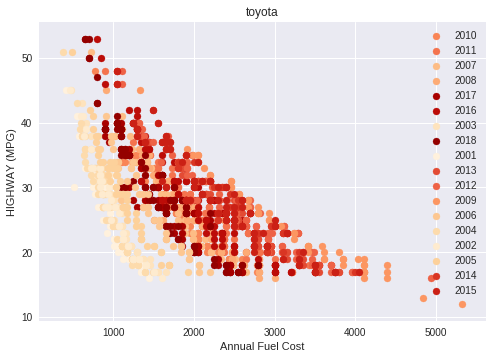

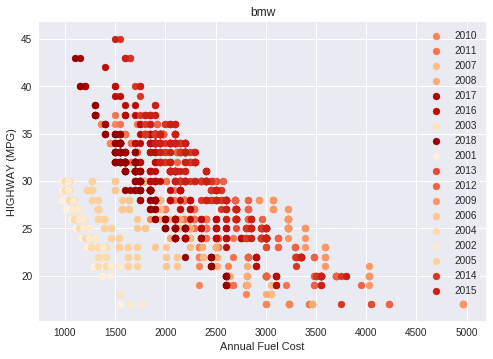

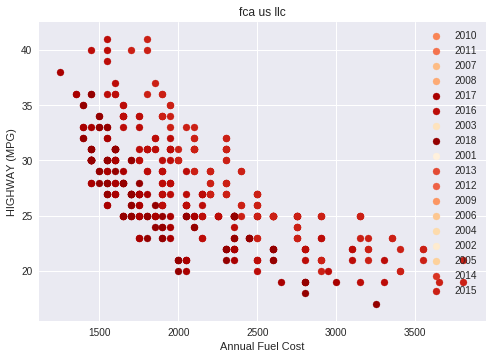

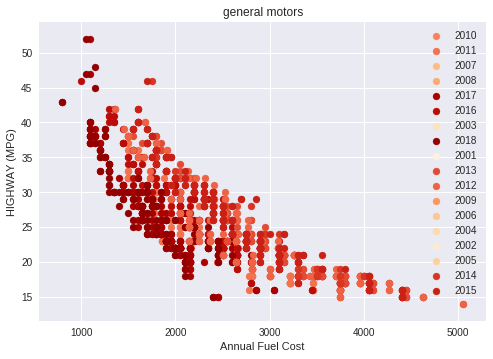

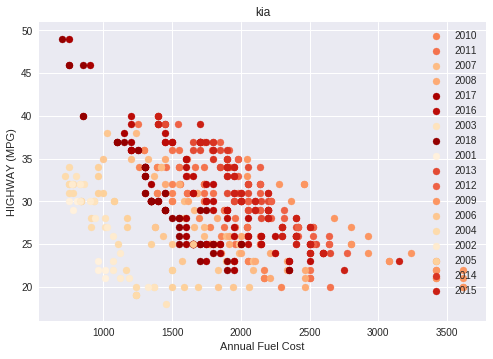

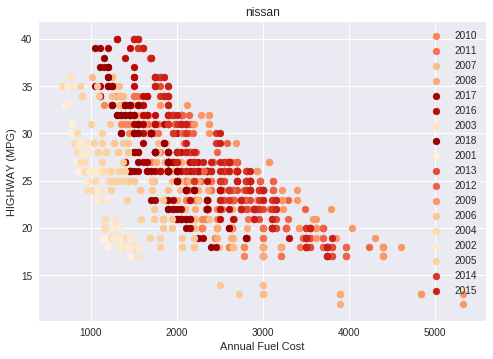

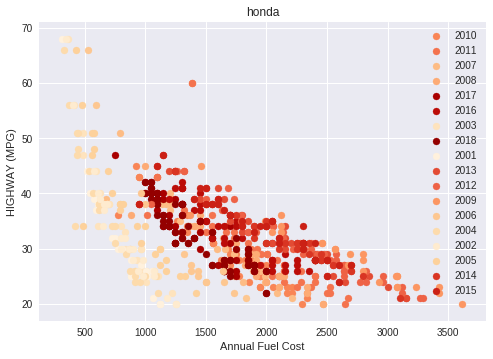

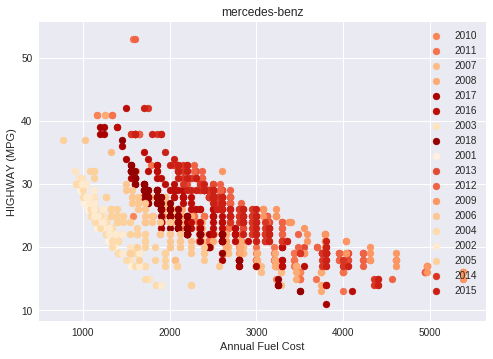

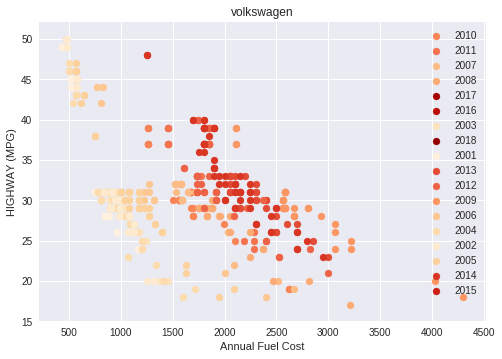

In [122]:
pin = sns.color_palette("OrRd", 18)


manufacturer = ['toyota', 'bmw', 'fca us llc','general motors', 'kia', 'nissan', 'honda', 'mercedes-benz', 'volkswagen']

for brands in manufacturer:
    fig = plt.figure()
    plt.title(brands)
    plt.xlabel('Annual Fuel Cost')
    plt.ylabel('HIGHWAY (MPG)')
    avg = []
    avg_2 = []
    for x in yearlst:
        curpd = pdfiles[x]
        th = curpd[curpd['Manufacturer'].str.lower() == brands]
        avg.append(th['fcost'].mean())
        avg_2.append(th['hwy'].mean())
        i = th['fcost']
        j = th['hwy']
        plt.scatter(i,j, color = pin[int(x)-2001],label = x)
        
    plt.legend()
    plt.show()

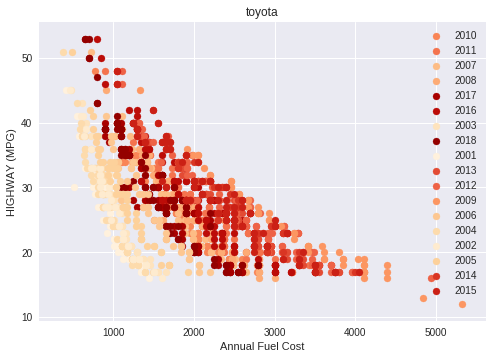

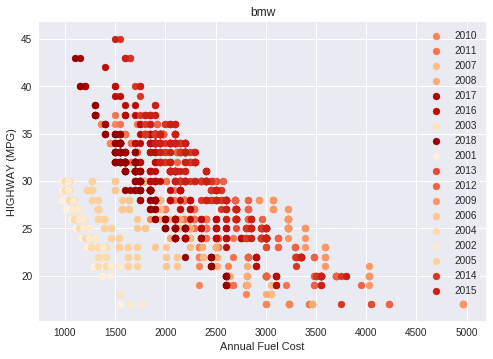

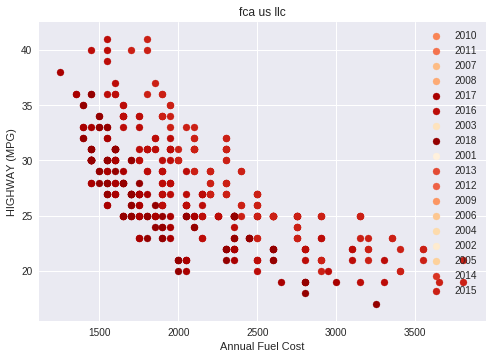

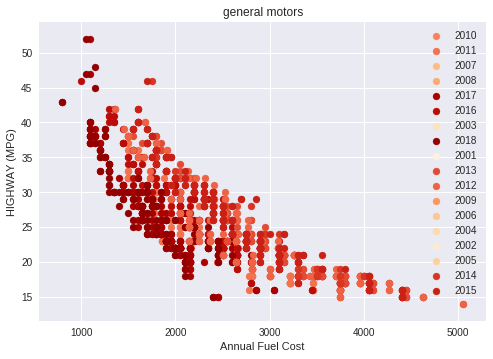

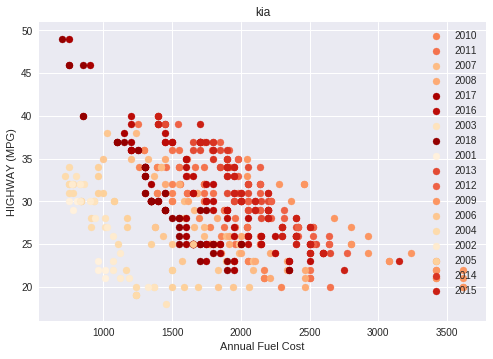

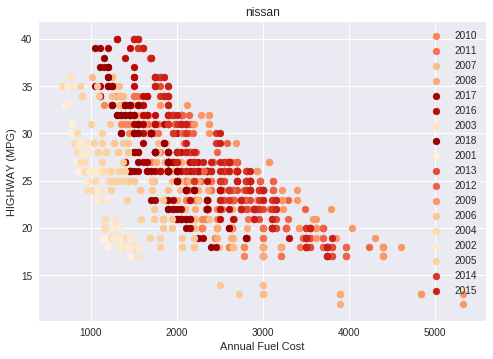

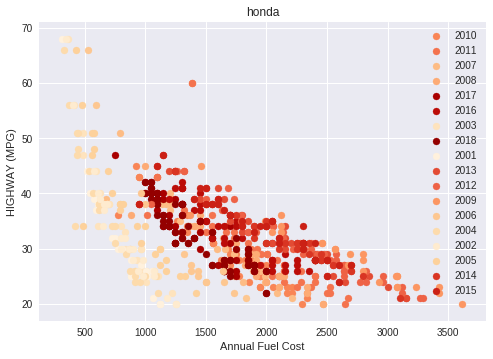

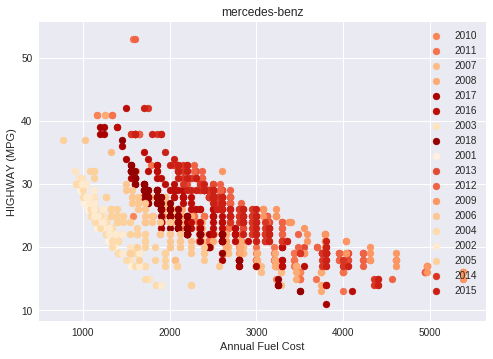

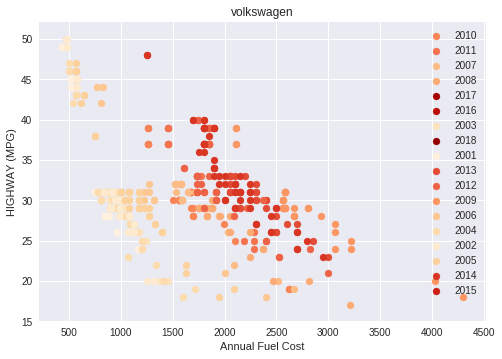

In [123]:
pin = sns.color_palette("OrRd", 18)


manufacturer = ['toyota', 'bmw', 'fca us llc','general motors', 'kia', 'nissan', 'honda', 'mercedes-benz', 'volkswagen']

for brands in manufacturer:
    fig = plt.figure()
    plt.title(brands)
    plt.xlabel('Annual Fuel Cost')
    plt.ylabel('HIGHWAY (MPG)')
    for x in yearlst:
        curpd = pdfiles[x]
        th = curpd[curpd['Manufacturer'].str.lower() == brands]
        i = th['fcost']
        j = th['hwy']
        plt.scatter(i,j, color = pin[int(x)-2001],label = x)
        
    plt.legend()
    plt.show()

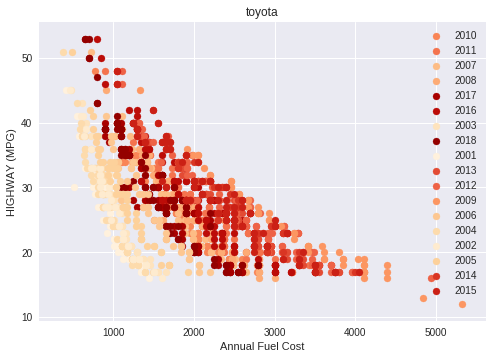

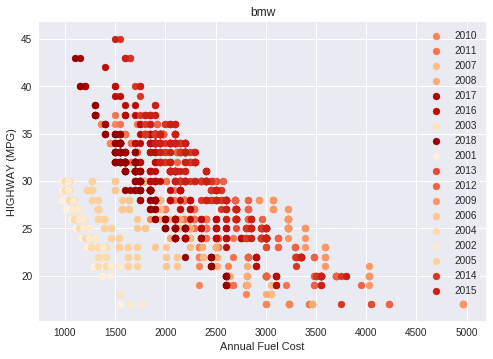

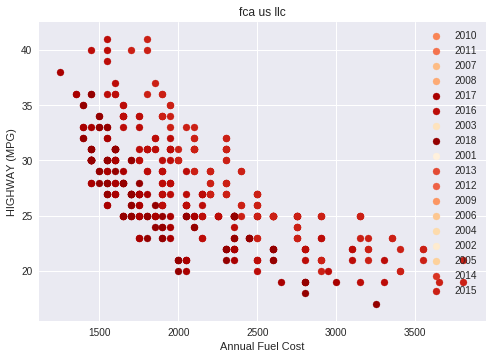

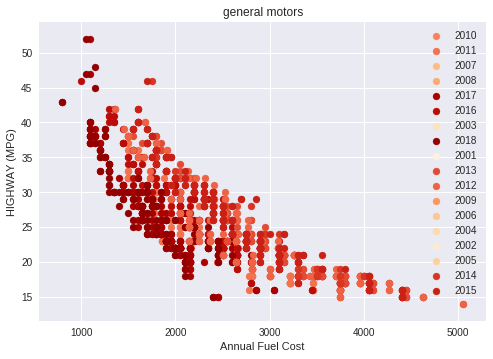

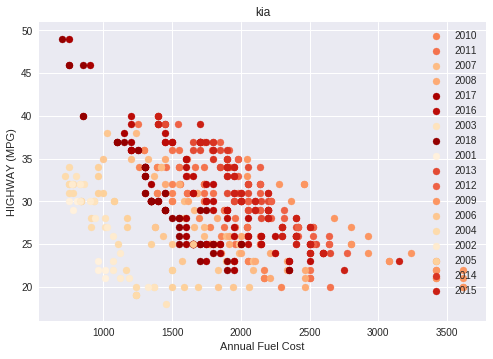

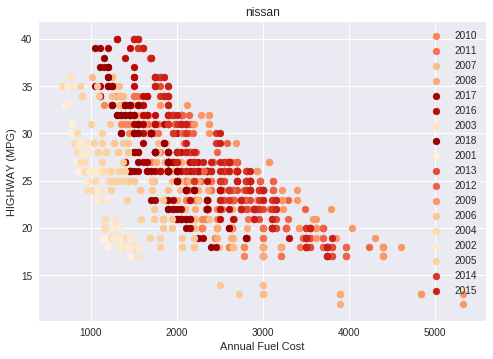

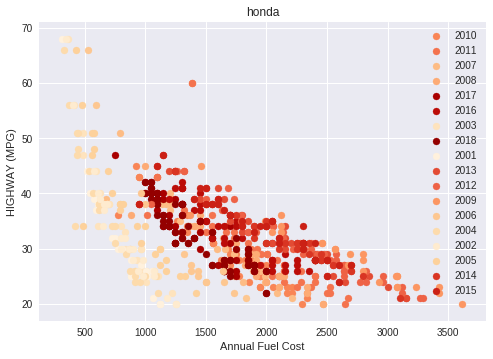

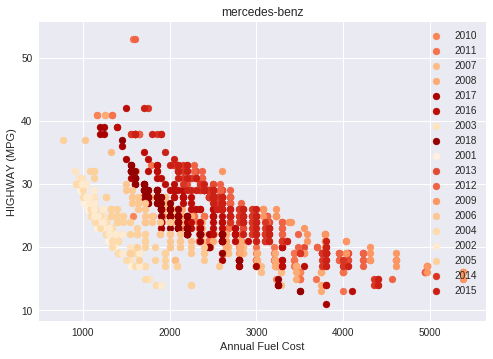

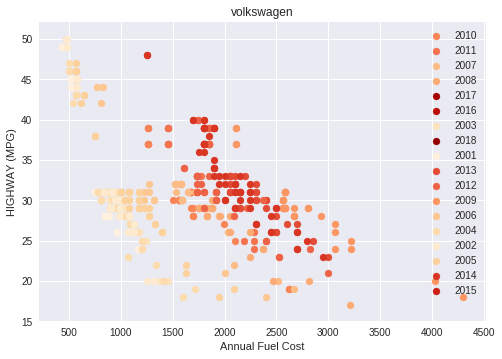

In [124]:
pin = sns.color_palette("OrRd", 18)


manufacturer = ['toyota', 'bmw', 'fca us llc','general motors', 'kia', 'nissan', 'honda', 'mercedes-benz', 'volkswagen']

for brands in manufacturer:
    fig = plt.figure()
    plt.title(brands)
    plt.xlabel('Annual Fuel Cost')
    plt.ylabel('HIGHWAY (MPG)')
    for x in yearlst:
        curpd = pdfiles[x]
        th = curpd[curpd['Manufacturer'].str.lower() == brands]
        i = th['fcost']
        j = th['cmb']
        plt.scatter(i,j, color = pin[int(x)-2001],label = x)
        
    plt.legend()
    plt.show()

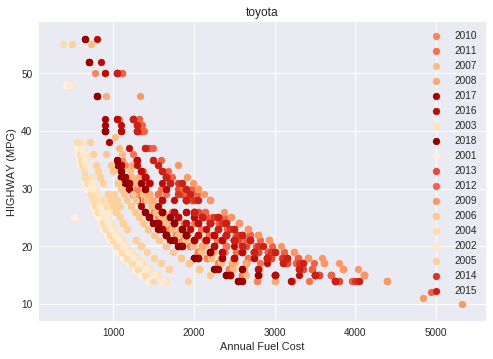

/opt/conda/lib/python3.6/site-packages/pandas/core/ops.py:792: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [131]:
manufacturer = ['toyota', 'bmw', 'fca us llc','general motors', 'kia', 'nissan','honda', 'mercedes-benz', 'volkswagen'] 
pin = sns.color_palette("OrRd", 18)

for i in ['hwy', 'cty', 'cmb']:
    for brands in manufacturer:
        fig = plt.figure()
        plt.title(brands)
        plt.xlabel('Annual Fuel Cost')
        if i == 'hwy':
            plt.ylabel('HIGHWAY (MPG)')
        elif i == 'cty':
            plt.ylabel('CITY (MPG)')
        else:
            plt.ylabel('City and Highway Combined(MPG)')
        for x in yearlst:
            curpd = pdfiles[x]
            th = curpd[curpd['Manufacturer'].str.lower() == brands]
            i = th['fcost']
            j = th['cmb']
            plt.scatter(i,j, color = pin[int(x)-2001],label = x)
        
        plt.legend()
        plt.show()
